<a href="https://colab.research.google.com/github/Aditic1/IPL_Sentiment/blob/main/Lemmatization_of_Train_And_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report


# Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Labelled_Dataset.csv'
Dataset = pd.read_csv(file_path,encoding='ISO-8859-1')
Dataset.dropna()

,english_text,Sentiment
0,"['brother', 'danger', 'pacer', 'season', 'ipl'...",Positive
1,"['purpl', 'heart', 'smile', 'face', 'horn']",Neutral
2,"['kkr', 'purpl', 'heart', 'smile', 'face', 'ho...",Positive
3,"['bar', 'ke', 'ipl', 'semi', 'final', 'mein', ...",Positive
4,"['csk', 'yellow', 'heart', 'yellow', 'heart', ...",Positive
...,...,...
1685,"['rcb', 'win', 'ipl', 'red', 'heart', 'red', '...",Positive
1686,"['kkr', 'purpl', 'heart']",Positive
1687,"['e', 'sala', 'cup', 'namad', 'red', 'heart']",Positive
1688,['kl'],Positive


# Count number of positives, negatives and neutrals

In [ ]:
Dataset['Sentiment'].value_counts()



Sentiment
Positive    1246
Neutral      292
Negative     152
Name: count, dtype: int64

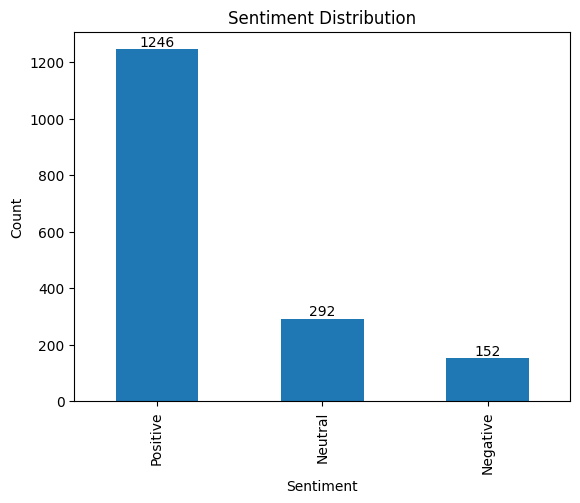

In [ ]:
# Counting sentiment occurrences
sentiment_counts = Dataset['Sentiment'].value_counts()

# Plotting the sentiment distribution
import matplotlib.pyplot as plt

ax = sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10)
plt.show()


# Split into test and train

In [ ]:
X = Dataset['english_text'].astype(str)
Y = Dataset['Sentiment']
#Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


# TF-IDF

In [ ]:

#create a tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

#Fit and transform the training data
X_tfidf_train = tfidf_vectorizer.fit_transform(X_train)

#Fit and transform the testing data
X_tfidf_test  = tfidf_vectorizer.transform(X_test)

tfidf_vectorizer.get_feature_names_out()


array(['aa', 'aaaaa', 'aah', ..., 'yrr', 'yudi', 'zealand'], dtype=object)

# Tranining the model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Create and train a Multinomial Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_tfidf_train, Y_train)

# Predictions on the test set
y_naive_pred = naive_bayes_classifier.predict(X_tfidf_test)


#For SVM
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_tfidf_train, Y_train)

# Predictions on the test set
y_svm_pred = svm_classifier.predict(X_tfidf_test)

from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier on the training data
random_forest_classifier.fit(X_tfidf_train, Y_train)

# Predictions on the test set
y_random_pred = random_forest_classifier.predict(X_tfidf_test)

from sklearn.naive_bayes import GaussianNB
import numpy as np

# Assuming Gaussian distribution for the features
# Convert sparse matrix to dense matrix
X_dense_train = X_tfidf_train.toarray()
X_dense_test = X_tfidf_test.toarray()

# Create and train a Gaussian Naive Bayes classifier
gaussian_classifier = GaussianNB()
gaussian_classifier.fit(X_dense_train, Y_train)

# Predictions on the test set
y_gaussian_pred = gaussian_classifier.predict(X_dense_test)


# Evaluating the accuracy with TF-IDF

In [ ]:
# Evaluate the Multinomial model
naive_tfidf_accuracy = accuracy_score(Y_test, y_pred = naive_bayes_classifier.predict(X_tfidf_test)
)
print("The accuracy with tfidf and naive bayes (Multinomial) is", naive_tfidf_accuracy)

naive_tfidf_gaussian_accuracy = accuracy_score(Y_test, y_gaussian_pred)

print("The accuracy with tfidf and naive bayes (Gaussian) is:", naive_tfidf_gaussian_accuracy)

# Evaluate the model
svm_tfidf_accuracy = accuracy_score(Y_test, y_svm_pred)
print("The accuracy with tfidf and SVM  is",svm_tfidf_accuracy)

# Evaluate the model
random_tfidf_accuracy = accuracy_score(Y_test, y_random_pred)
print("The accuracy with tfidf and Random Forest is", random_tfidf_accuracy)


The accuracy with tfidf and naive bayes (Multinomial) is 0.7248520710059172
The accuracy with tfidf and naive bayes (Gaussian) is: 0.4467455621301775
The accuracy with tfidf and SVM  is 0.7633136094674556
The accuracy with tfidf and Random Forest is 0.7337278106508875


#Bag Of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')

#Fit and Transform the training data
X_cv_train = vectorizer.fit_transform(X_train)
#Fit and transform the testing data
X_cv_test = vectorizer.transform(X_test)
vectorizer.get_feature_names_out()


array(['aa', 'aaaaa', 'aah', ..., 'yrr', 'yudi', 'zealand'], dtype=object)

Naive Bayes

In [ ]:
#Naive Bayes classifier
naive_bayes_classifier.fit(X_cv_train, Y_train)
# Predictions on the test set
y_pred = naive_bayes_classifier.predict(X_cv_test)

X_dense_train = X_cv_train.toarray()
X_dense_test = X_cv_test.toarray()

# Create and train a Gaussian Naive Bayes classifier
gaussian_classifier = GaussianNB()
gaussian_classifier.fit(X_dense_train, Y_train)

# Predictions on the test set
y_gaussian_pred = gaussian_classifier.predict(X_dense_test)

#SVM
svm_classifier.fit(X_cv_train, Y_train)

# Predictions on the test set
y_SVM_pred = svm_classifier.predict(X_cv_test)

#Random Forest
random_forest_classifier.fit(X_cv_train, Y_train)

# Predictions on the test set
y_random_pred = random_forest_classifier.predict(X_cv_test)


Accuracy with SVM, Naive and RandomForest with Bag of Words
---



In [ ]:
# Evaluate the model
naive_cv_accuracy = accuracy_score(Y_test, y_pred)
print("The accuracy with BOW and Naive (Multinomial) is",naive_cv_accuracy)

naive_cv_gaussian_accuracy = accuracy_score(Y_test,y_gaussian_pred)
print("The accuracy with tfidf and naive bayes (Gaussian) is:", naive_tfidf_gaussian_accuracy)

# Evaluate the model
svm_cv_accuracy = accuracy_score(Y_test, y_SVM_pred)
print("The accuracy with BOW and SVM is",svm_cv_accuracy)

random_cv_accuracy = accuracy_score(Y_test, y_random_pred)
print("The accuracy with BOW and RandomForest (Multinomial) is:", random_cv_accuracy)

The accuracy with BOW and Naive (Multinomial) is 0.7603550295857988
The accuracy with tfidf and naive bayes (Gaussian) is: 0.4467455621301775
The accuracy with BOW and SVM is 0.742603550295858
The accuracy with BOW and RandomForest (Multinomial) is: 0.742603550295858


#

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/IPL.csv', encoding='latin1')
dataset

,Unnamed: 0.1,Unnamed: 0,author,text,english_text
0,0,0,@SumitGupta-it6ic,bhai lsg ke paas ipl ke is season ka sabse kha...,"Brother, the most dangerous pacer of this seas..."
1,1,1,@Mrhameedraza,Saare team tere ammi Ki pass pahuchegi,All the teams will reach your mother.
2,2,2,@Mrhameedraza,Sale Sare team Mein weekness Hai To Tu Hi Chal...,There is weakness in the whole team so that yo...
3,3,3,@ShiaLovERs572,ðð,:purple_heart: :smiling_face_with_horns:
4,4,4,@ShiaLovERs572,KkR ðð Final Winners ð,KkR :purple_heart: :smiling_face_with_horns:...
...,...,...,...,...,...
30935,30935,30827,@Ustaadgaming4564,à¤à¥à¤¨ à¤à¥à¤¨ à¤à¤¾à¤¹à¤¤à¤¾ à¤¹à¥ à¤...,Who wants Rohit Sharma to captain the T20 Worl...
30936,30936,30828,@quincric897,à¤à¥à¤¨-à¤à¥à¤¨ à¤®à¤¹à¥à¤à¤¦à¥à¤° à¤¸à...,Who is a fan of Mahendra Singh Dhoni by heart ...
30937,30937,30829,@aasifraza3896,â¤â¤â¤,:red_heart: :red_heart: :red_heart:
30938,30938,30830,@quincric897,à¤à¥à¤¨-à¤à¥à¤¨ à¤à¥à¤¨à¥à¤¨à¤ à¤¸à¥à...,Who wholeheartedly supports Chennai Super King...


In [ ]:
import re

texts = []
for i in range(len(dataset)):
    if isinstance(dataset['english_text'][i], str):  # Check if the value is a string
        text = re.sub('[^a-zA-Z]', ' ', dataset['english_text'][i])
        text = text.lower()
        text = text.split()
        x = len(text) if text.count('https') == 0 else text.index('https')
        text = text[:x]
        text = [t for t in text if not t == 'https']
        text = ' '.join(text)
        texts.append(text)


In [ ]:
print(len(texts))

30940


In [ ]:
from gensim.models import Word2Vec


In [ ]:
sentences = [line.split() for line in texts]

w2v = Word2Vec(sentences, vector_size=100, window=5, workers=4, epochs=10, min_count=3)
print(sentences[20:25])

[['pbks', 'relieved', 'face', 'white', 'heart'], ['mi', 'red', 'heart', 'red', 'heart'], ['dc', 'playing', 'br', 'br', 'warner', 'br', 'shah', 'br', 'marsh', 'br', 'macgurk', 'br', 'brook', 'br', 'pant', 'br', 'axar', 'br', 'kuldeep', 'br', 'mukesh', 'br', 'khaleel', 'br', 'ishant'], ['super', 'giant', 'ke', 'paas', 'luck', 'nhi', 'hai', 'face', 'with', 'tears', 'of', 'joy', 'face', 'with', 'tears', 'of', 'joy', 'face', 'with', 'tears', 'of', 'joy', 'sa', 'me', 'bhi', 'final', 'me', 'har', 'face', 'with', 'tears', 'of', 'joy', 'face', 'with', 'tears', 'of', 'joy', 'face', 'with', 'tears', 'of', 'joy'], ['gt', 'has', 'big', 'all', 'rounder', 'rashid', 'khan', 'rahul', 'tewatia', 'vijay', 'sah', 'rukh', 'kha']]


In [ ]:
words = list(w2v.wv.key_to_index.keys())
print(words)
print(len(words))

['heart', 'red', 'face', 'br', 'with', 'of', 'tears', 'joy', 'rcb', 'the', 'is', 'a', 'to', 'yellow', 'smiling', 'and', 'in', 'i', 'you', 's', 'csk', 'party', 'popper', 'crying', 'will', 'on', 'grinning', 'for', 'rohit', 'not', 'hardik', 'sweat', 'this', 'fire', 'team', 'blue', 'mi', 'purple', 'kkr', 'ipl', 'eyes', 'it', 'that', 'he', 'hai', 't', 'sharma', 'like', 'be', 'are', 'captain', 'bhai', 'video', 'sir', 'mouth', 'cup', 'have', 'kohli', 'match', 'but', 'mumbai', 'trophy', 'win', 'me', 'href', 'my', 'virat', 'fan', 'ka', 'airplane', 'has', 'no', 'only', 'best', 'or', 'gt', 'b', 'who', 'we', 'brother', 'srh', 'from', 'pandya', 'was', 'also', 'please', 'fans', 'what', 'all', 'rahul', 'one', 'your', 'time', 'player', 'enraged', 'hands', 'love', 'should', 'orange', 'if', 'because', 'am', 'symbols', 'do', 'playing', 'up', 'ki', 'can', 'why', 'open', 'there', 'jai', 'cricket', 'rr', 'as', 'lsg', 'king', 'biceps', 'flexed', 'mark', 'index', 'pointing', 'so', 'they', 'backhand', 'rolling

In [ ]:
w2v.wv.similarity('rcb', 'red')

0.42840803

In [ ]:
print(w2v.wv.most_similar('yellow'))

[('yellove', 0.7557085156440735), ('text', 0.7164194583892822), ('purple', 0.6882122159004211), ('goal', 0.6775799989700317), ('blue', 0.6732689142227173), ('orange', 0.668631374835968), ('royalty', 0.6499009132385254), ('thx', 0.6452141404151917), ('subscriber', 0.6443500518798828), ('mahirat', 0.6307753920555115)]


In [ ]:
w2v.save("word2vec.model")

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:

# Load the saved Word2Vec model
model_w2v = Word2Vec.load("word2vec.model")

# Tokenize your dataset
# Assuming your dataset is stored in a DataFrame named 'dataset' and the text column is named 'english_text'
texts = X_train
tokenized_texts = [word_tokenize(text) for text in texts]

# Function to create average word vectors
def feature_vectorizer(tokens, model):
    words = [word for word in tokens if word in model.wv]
    if words:
        return np.mean(model.wv[words], axis=0)
    else:
        return np.zeros(model.vector_size)

# Transforming text into average vectors
x_train_w2v = np.array([feature_vectorizer(tokens, model_w2v) for tokens in tokenized_texts])

tokenized_texts_test = [word_tokenize(text) for text in X_test]

# Transforming test text into average vectors
x_test_w2v = np.array([feature_vectorizer(tokens, model_w2v) for tokens in tokenized_texts_test])

# Now x_dataset_w2v contains the Word2Vec embeddings for your dataset.
# You can use these embeddings as features for your machine learning models.

Word2vec random forest

In [ ]:
#Naive Bayes(Gaussian)
gaussian_nb_classifier = GaussianNB()
# Fit the classifier on the training data
gaussian_nb_classifier.fit(x_train_w2v, Y_train)

# Predictions on the test set
y_pred_w2v_nb = gaussian_nb_classifier.predict(x_test_w2v)
random_forest_classifier.fit(x_train_w2v, Y_train)

# Predictions on the test set
y_pred_w2v = random_forest_classifier.predict(x_test_w2v)

# Evaluate the model

svm_classifier.fit(x_train_w2v, Y_train)  # Use x_train_w2v instead of X_cv_train

# Predictions on the test set
y_pred_w2v = svm_classifier.predict(x_test_w2v)  # Use x_test_w2v instead of X_cv_test



In [ ]:
# Evaluate the model
w2v_nb_accuracy = accuracy_score(Y_test, y_pred_w2v_nb)
print("Accuracy using Word2Vec with Gaussian Naive Bayes:", w2v_nb_accuracy)
#Evaluate accuracy with random forest
w2v_rf_accuracy = accuracy_score(Y_test, y_pred_w2v)
print("Accuracy using Word2Vec random forest:", w2v_rf_accuracy)

# Evaluate the model
w2v_svm_accuracy = accuracy_score(Y_test, y_pred_w2v)
print("Accuracy using Word2Vec SVM:", w2v_svm_accuracy)

Accuracy using Word2Vec with Gaussian Naive Bayes: 0.23372781065088757
Accuracy using Word2Vec random forest: 0.7071005917159763
Accuracy using Word2Vec SVM: 0.7071005917159763


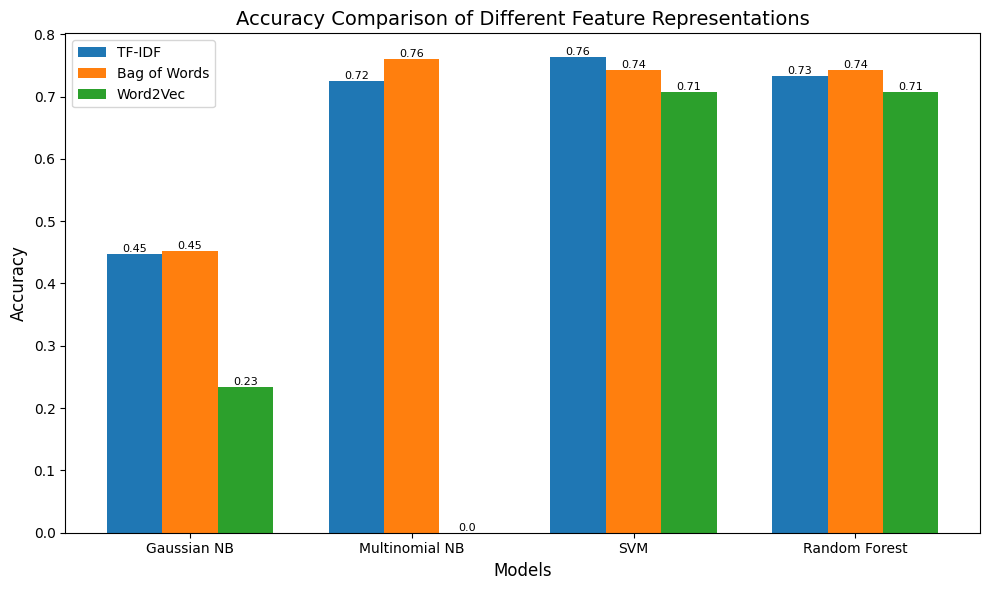

In [ ]:
import matplotlib.pyplot as plt

# Accuracies for different feature representations
tfidf_accuracies = [naive_tfidf_gaussian_accuracy, naive_tfidf_accuracy, svm_tfidf_accuracy, random_tfidf_accuracy]
cv_accuracies = [naive_cv_gaussian_accuracy, naive_cv_accuracy, svm_cv_accuracy, random_cv_accuracy]
w2v_accuracies = [w2v_nb_accuracy, 0, w2v_rf_accuracy, w2v_svm_accuracy]

# Labels for the bars
models = ['Gaussian NB', 'Multinomial NB', 'SVM', 'Random Forest']

# Plotting the accuracies
plt.figure(figsize=(10, 6))

bar_width = 0.25
index = range(len(models))

bars1 = plt.bar(index, tfidf_accuracies, bar_width, label='TF-IDF')
bars2 = plt.bar([i + bar_width for i in index], cv_accuracies, bar_width, label='Bag of Words')
bars3 = plt.bar([i + bar_width*2 for i in index], w2v_accuracies, bar_width, label='Word2Vec')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy Comparison of Different Feature Representations', fontsize=14)
plt.xticks([i + bar_width for i in index], models)
plt.legend()

# Adding labels on top of each bar
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()
